In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Gerando o dataframe

In [ ]:
fname = '../examples/test.csv'


In [3]:
df = pd.read_csv(fname,sep=';')

In [12]:
df['total_timesteps'] = df['num_steps'].cumsum()
df['total_episodes'] = df['num_episodes'].cumsum()

In [13]:
df = df.set_index('total_timesteps')

# Plots indexados em total_timesteps

Text(0.5, 1.0, 'Average Reward')

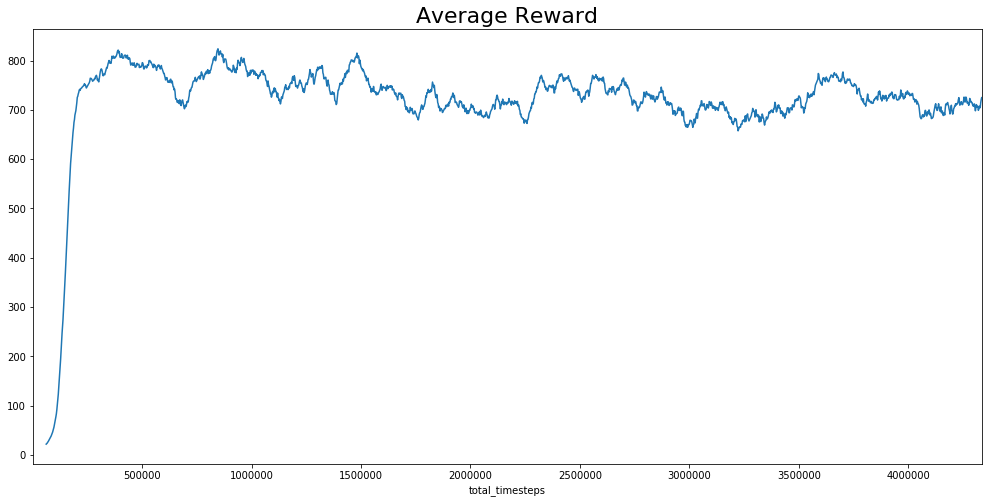

In [21]:
window_size = 30
fig , ax = plt.subplots(figsize=(17,8))
df['avg_reward'].rolling(window_size).mean().plot(ax =ax )
plt.title('Average Reward',size=22)

Text(0.5, 1.0, 'MIN Reward')

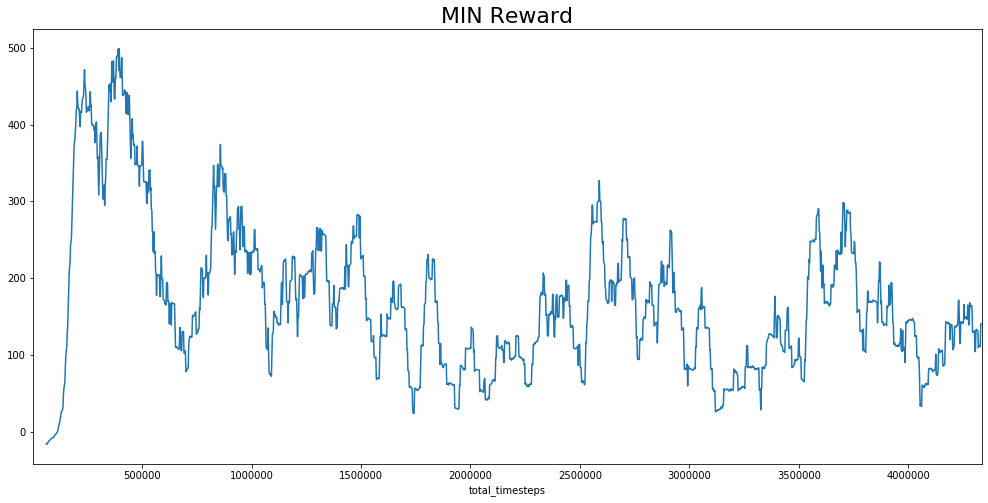

In [22]:
window_size = 30
fig , ax = plt.subplots(figsize=(17,8))
df['min_reward'].rolling(window_size).mean().plot(ax =ax )
plt.title('MIN Reward',size=22)


Text(0.5, 1.0, 'Lenght Mean')

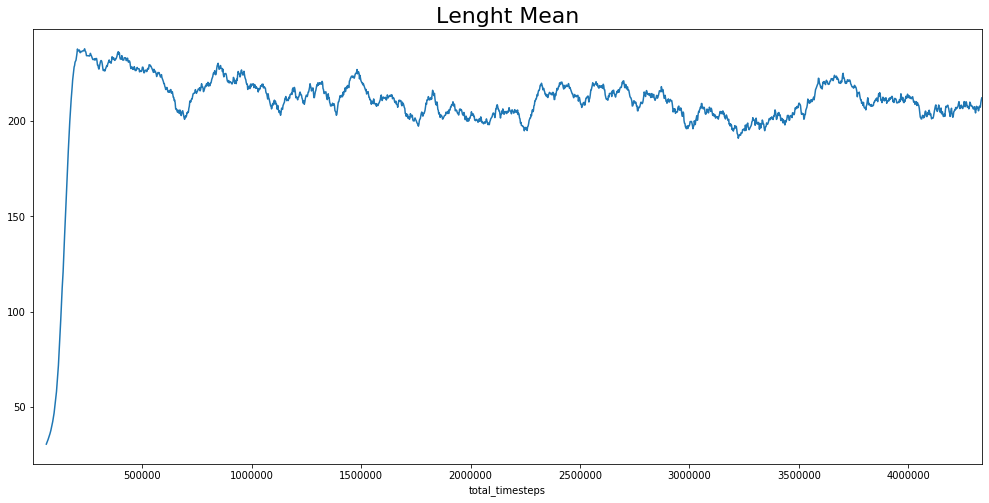

In [23]:
window_size = 30
fig , ax = plt.subplots(figsize=(17,8))
df['lenght_mean'].rolling(window_size).mean().plot(ax =ax )
plt.title('Lenght Mean',size=22)




Text(0.5, 1.0, 'Lenght Min')

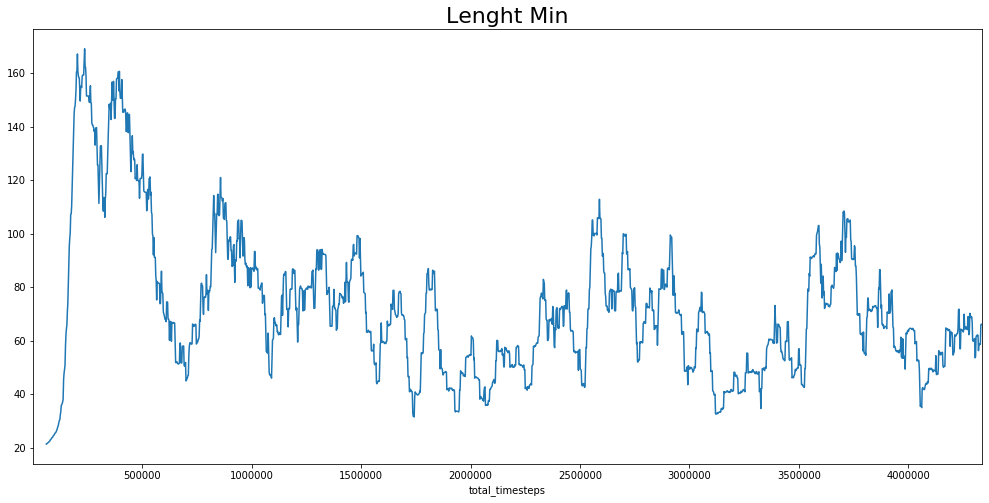

In [24]:
window_size = 30
fig , ax = plt.subplots(figsize=(17,8))
df['lenght_min'].rolling(window_size).mean().plot(ax =ax )
plt.title('Lenght Min',size=22)


